#Next Word Prediction model

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle
import heapq

# ***Data Visualization:***



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the data to the variable
data = '/content/drive/MyDrive/Seminars & Projects/Corpus_NLP.txt'

text = open(data,'r',encoding='cp1252')
text_f = text.read()

# text_f = ' My name is Saurabh, His name is Dilip. Other do not have any name. My dogs name is Leo.'
f = text_f.lower()

In [5]:
print('corpus length:', len(f))

corpus length: 274435


# ***Data Preprocessing:*** 

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(f)
stop_words2 = {'a', '.', ',', '?', '!', '"','ain','aren','couldn','d','didn','doesn','isn','ll','m','ma','me','mightn','mustn','o','re','s','shan',"shan't",'shouldn','t','to','too','ve','wasn','y', 'the'} 
print(len(stop_words2))
# stop_words2
print(len(word_tokens))

32
61924


In [8]:
# Method 1:

filtered_text = [w for w in word_tokens if not w.lower() in stop_words2]
 
print(len(filtered_text)) 

# Method 2:

# filtered_text = []
 
# for w in word_tokens:
#     if w not in stop_words2:
#         filtered_text.append(w)
 
# print(len(filtered_text))

48702


In [9]:
filtered_text2 = ' '.join(filtered_text)

In [ ]:
# Importing RegexTeokenizer module from NLTK library
from nltk.tokenize import RegexpTokenizer

In [ ]:
# #Tokenizing the data and converting to tokens
tokenizer = RegexpTokenizer(r'\w+')
# #lowering the case
# wo = f.lower() 
words = tokenizer.tokenize(filtered_text2)
print(len(words))

45888


In [ ]:
#Extracting the unique words using the np.unique function
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))
print(len(unique_words))

4593


# ***Word Embedding:***

In [ ]:
#Finding the previous and next words
length = 3
prev = []
next= []
for i in range(len(words) - length):
    prev.append(words[i:i + length])
    next.append(words[i + length])
#Printing the previous and next words
print("Previous :",prev[0])
print("Next :",next[0])

Previous : ['1', 'jungle', 'book']
Next : by


In [ ]:
print(len(prev), len(next))

45885 45885


In [ ]:
import numpy as np
#Creating the array with number of zeros
X = np.zeros((len(prev), length, len(unique_words)), dtype=bool)
Y = np.zeros((len(next), len(unique_words)), dtype=bool)

In [ ]:
#Properly indexing the previous and next words
for i, each_words in enumerate(prev):
    for j, word in enumerate(each_words):
        X[i, j, unique_word_index[word]] = 1
    Y[i, unique_word_index[next[i]]] = 1

In [ ]:
X.shape

(45885, 3, 4593)

In [ ]:
Y.shape

(45885, 4593)

# ***Model for Next Word Prediction:***

In [ ]:
!pip install keras

In [ ]:
#Importing the Keras library for models and model operations
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop

In [ ]:
#Selecting the Sequential model 
model = Sequential()
# LSTM as Encoder:
model.add(LSTM(128, input_shape=(length, len(unique_words))))
model.add(Dense(1000, activation='relu')) 
model.add(Dense(len(unique_words)))
#setting Softmax Activation function
model.add(Activation('softmax'))

#setting the RMSprop Optimizer
optimizer = RMSprop(learning_rate=0.01)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               2417664   
                                                                 
 dense_2 (Dense)             (None, 1000)              129000    
                                                                 
 dense_3 (Dense)             (None, 4593)              4597593   
                                                                 
 activation_1 (Activation)   (None, 4593)              0         
                                                                 
Total params: 7,144,257
Trainable params: 7,144,257
Non-trainable params: 0
_________________________________________________________________


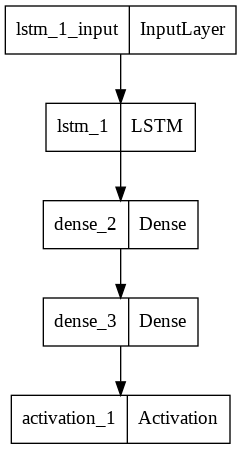

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model, to_file = 'plot.png', show_layer_names=True)

In [ ]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Training the model.
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=30, shuffle=True).history

Epoch 1/30
341/341 [==============================] - 99s 280ms/step - loss: 6.5658 - accuracy: 0.0724 - val_loss: 6.6292 - val_accuracy: 0.0641
Epoch 2/30
341/341 [==============================] - 95s 280ms/step - loss: 5.9726 - accuracy: 0.1073 - val_loss: 6.5406 - val_accuracy: 0.0828
Epoch 3/30
341/341 [==============================] - 95s 279ms/step - loss: 5.6824 - accuracy: 0.1249 - val_loss: 6.7077 - val_accuracy: 0.0850
Epoch 4/30
341/341 [==============================] - 94s 275ms/step - loss: 5.4376 - accuracy: 0.1443 - val_loss: 7.0332 - val_accuracy: 0.0845
Epoch 5/30
341/341 [==============================] - 95s 279ms/step - loss: 5.0936 - accuracy: 0.1687 - val_loss: 7.3716 - val_accuracy: 0.0715
Epoch 6/30
341/341 [==============================] - 92s 270ms/step - loss: 4.6777 - accuracy: 0.2051 - val_loss: 7.7488 - val_accuracy: 0.0580
Epoch 7/30
341/341 [==============================] - 91s 267ms/step - loss: 4.1230 - accuracy: 0.2617 - val_loss: 8.5813 - val_ac

In [ ]:
#Saving the model as h5 file
model.save('/content/drive/MyDrive/Seminars & Projects/NLP Next Word Prediction/next_word_model_2.h5.h5')
pickle.dump(history, open("/content/drive/MyDrive/Seminars & Projects/NLP Next Word Prediction/history_2.p", "wb"))

In [ ]:
#Loading the model
model = load_model('/content/drive/MyDrive/Seminars & Projects/NLP Next Word Prediction/next_word_model_2.h5.h5')
history = pickle.load(open("/content/drive/MyDrive/Seminars & Projects/NLP Next Word Prediction/history_2.p", "rb"))

In [ ]:
#Defining a function to prepare input for using in model
def prep(text):
    x = np.zeros((1, length, len(unique_words)))
    for a, word in enumerate(text.split()):
        print(word)
        x[0, a, unique_word_index[word]] = 1
    print(x.shape)
    return x

In [ ]:
#using the prep funtion we are transforming the data
prep("I am very".lower())

i
am
very
(1, 3, 4593)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
#Defining a function called sample
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def completions(text, n=3):
    if text == "":
        return("0")
    x = prep(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

# ***Testing:***

In [ ]:
q =  "i have never"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[-3:])
print("Sequence: ",seq)
print("next possible words: ", completions(seq, 3))

correct sentence:  i have never
Sequence:  i have never
i
have
never
(1, 3, 4593)
next possible words:  ['seen', 'betray', 'fasted']


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)